## Analyze trending topics on Twitter, Instagram, or LinkedIn to understand user interests and market shifts.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from textblob import TextBlob
import requests
from bs4 import BeautifulSoup

In [2]:
# Load dataset
file_path = "sentimentdataset.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Data Cleaning
df = df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], errors='ignore')
df = df.drop_duplicates()
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [15]:
# Extract Trending Hashtags
all_hashtags = df["Hashtags"].dropna().str.lower().str.split()
flattened_hashtags = [tag for sublist in all_hashtags for tag in sublist]
hashtag_counts = Counter(flattened_hashtags)
top_hashtags = hashtag_counts.most_common(10)

In [16]:
# Sentiment Analysis with TextBlob
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

df["Sentiment_Score"] = df["Text"].apply(get_sentiment)
df["Sentiment_Analysis"] = df["Sentiment_Score"].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))


In [22]:
# Web Scraping with BeautifulSoup (Example: Scraping Google Trends)


def scrape_trending_topics():
    url = "https://trends.google.com/trends/trendingsearches/daily"
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    # Extract trending topics (modify based on actual website structure)
    trends = [trend.text for trend in soup.find_all("div", class_="title")]
    return trends[:10]  # Get top 10 trending topics

try:
    trending_topics = scrape_trending_topics()
    print("Trending Topics from Google Trends:", trending_topics)
except Exception as e:
    print("Web scraping failed:", e)

Trending Topics from Google Trends: []


In [29]:
# Engagement Insights
top_retweets = df.nlargest(10, "Retweets")[["Text", "Retweets"]]
top_likes = df.nlargest(10, "Likes")[["Text", "Likes"]]
print("\nTop 10 Posts by Retweets:\n", top_retweets)
print("\nTop 10 Posts by Likes:\n", top_likes)



Top 10 Posts by Retweets:
                                                   Text  Retweets
335  Thrilled to witness the grandeur of a cultural...      40.0
345  Motivated to achieve fitness goals after an in...      40.0
355  Anticipation for an upcoming adventure in an e...      40.0
368  Elation over discovering a rare book in a quai...      40.0
382  A sense of wonder at the vastness of the cosmo...      40.0
402  Awe-inspired by the vastness of the cosmos on ...      40.0
432  Heartache deepens, a solitary journey through ...      40.0
470  Dancing on sunshine, each step a celebration o...      40.0
481  Surrounded by the colors of joy, a canvas pain...      40.0
510  At the front row of Adele's concert, each note...      40.0

Top 10 Posts by Likes:
                                                   Text  Likes
335  Thrilled to witness the grandeur of a cultural...   80.0
345  Motivated to achieve fitness goals after an in...   80.0
355  Anticipation for an upcoming adventure in

Text(0, 0.5, 'Post Count')

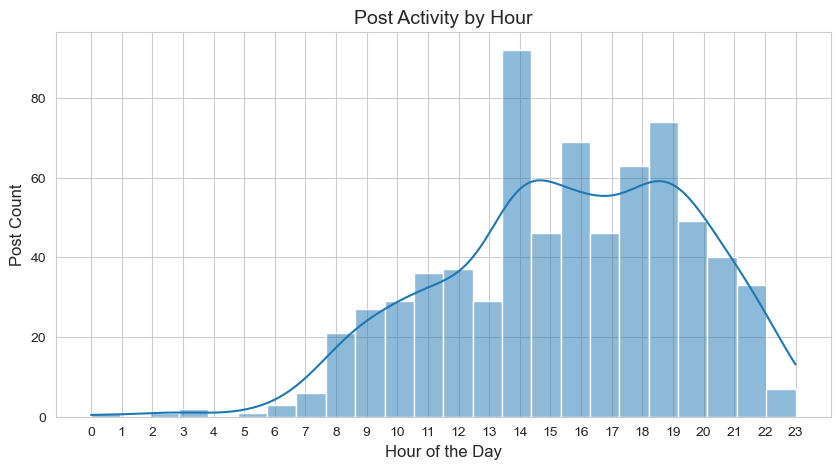

In [33]:
# Visualization: Post Activity by Hour
plt.figure(figsize=(10, 5))
sns.histplot(df["Hour"].dropna(), bins=24, kde=True)
plt.xticks(range(0, 24))
plt.title("Post Activity by Hour", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Post Count", fontsize=12)

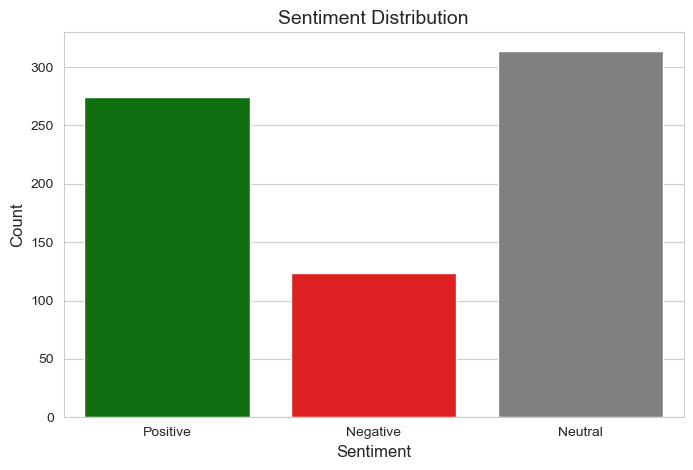

In [34]:
# Visualization: Sentiment Distribution
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Sentiment_Analysis", palette={"Positive": "green", "Neutral": "gray", "Negative": "red"})
plt.title("Sentiment Distribution", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

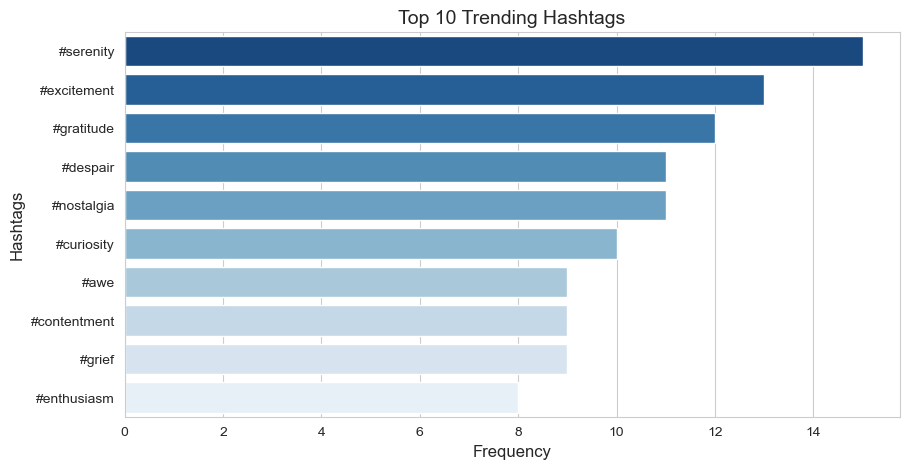

In [35]:
# Visualization: Top Hashtags
hashtags, counts = zip(*top_hashtags)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(hashtags), palette="Blues_r")
plt.title("Top 10 Trending Hashtags", fontsize=14)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Hashtags", fontsize=12)
plt.show()
